In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time as ttime
import random
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
%matplotlib inline

In [13]:
## bandpass filter

# simulation params
srate = 44100
time  = np.arange(0,2-1/srate,1/srate)
pnts  = len(time)

In [14]:
# signal 
signal = np.sin(2*np.pi*4*time) + np.sin(2*np.pi*10*time)

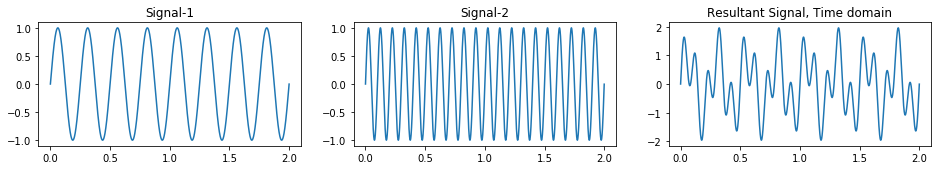

In [49]:
plt.figure(figsize=(16,5))
plt.subplots_adjust(wspace=.2, hspace=.2)
plt.subplot(2,3,1)
plt.title('Signal-1')
plt.plot(time,np.sin(2*np.pi*4*time))

plt.subplot(2,3,2)
plt.title('Signal-2')
plt.plot(time,np.sin(2*np.pi*10*time))
         
plt.subplot(2,3,3)
plt.title('Resultant Signal, Time domain')
plt.plot(time,signal)

In [15]:
fCoefs = fftpack.fft(signal)

In [16]:
# frequencies in Hz
hz = np.linspace(0,srate/2,int(np.floor(pnts/2.0)+1))

In [17]:
# find the coefficient for 10 Hz
freqidx = np.argmin(np.abs(hz-10))

In [18]:
fCoefsMod = list(fCoefs[0:len(hz)])
fCoefsMod[freqidx] = 0

In [19]:
signalX = fftpack.ifft(fCoefsMod)

In [ ]:
# plot original amplitude spectrum
plt.stem(hz,2*np.abs(fCoefs[0:len(hz)]))
plt.xlim([0,25])
plt.title('Original signal, frequency domain')
plt.show()

(0, 25)

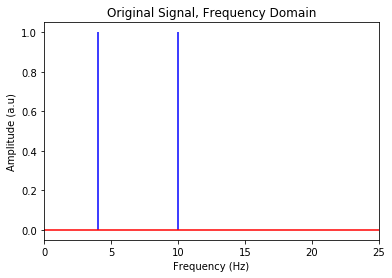

In [51]:

fig, ax = plt.subplots()
#plt.subplot(3,3,2)
plt.title('Original Signal, Frequency Domain')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (a.u)")
y=2*np.abs(fCoefs[0:len(hz)])/pnts
ax.axhline(hz[0],hz[10],0, color='r')
ax.vlines(hz, 0, y, color='b')
ax.set_xlim(0,25)
#ax.set_ylim([1.05*y.min(), 1.05*y.max()])

In [27]:
ModSigFFTCoef = fftpack.fft(signalX)

In [56]:
len(signalX)

44100

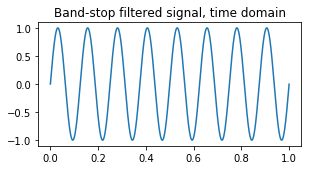

In [66]:
# and plot modulated time series
plt.figure(figsize=(16,5))
plt.subplot(2,3,1)
plt.plot(time[0:44100],np.real(signalX))
plt.title('Band-stop filtered signal, time domain')
plt.show()


Text(0,0.5,'Amplitude (a.u)')

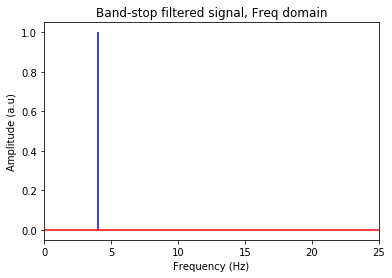

In [65]:
fig, ax = plt.subplots()
#plt.subplot(3,3,2)
y=2*np.abs(ModSigFFTCoef[0:len(hz)])/pnts
ax.axhline(hz[0],hz[10],0, color='r')
ax.vlines(hz, 0, y, color='b')
ax.set_xlim(0,25)
plt.title('Band-stop filtered signal, Freq domain')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (a.u)")

In [67]:
print('Len of Freq Scale ',len(hz))
print('Len of FFT  Coef  ',len(fCoefs))
print('Len of Ampl       ',len(fCoefs[0:len(hz)]))
print('Len of Signal     ',len(signal))
print('Len of Fil FFT Coe',len(fCoefs[0:len(hz)]))
print('Len of Time Points',int((pnts/2)+1))
print(len(time[0:1000]))

Len of Freq Scale  44100
Len of FFT  Coef   88199
Len of Ampl        44100
Len of Signal      88199
Len of Fil FFT Coe 44100
Len of Time Points 44100
1000
